## 1. Data Summary and Cleaning

### First 5 rows of the dataset:
         Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0  2020-01-30             Kerala   10.8505    76.2711                    1.0   
1  2020-01-31             Kerala   10.8505    76.2711                    1.0   
2  2020-02-01             Kerala   10.8505    76.2711                    2.0   
3  2020-02-02             Kerala   10.8505    76.2711                    3.0   
4  2020-02-03             Kerala   10.8505    76.2711                    3.0   

  Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  
0     0                        0.0          0           0              0  
1     0                        0.0          0           0              0  
2     0                        0.0          1           0              0  
3     0                        0.0          1           0              0  
4     0                        0.0          0           0              0  

##

/var/folders/vv/hlt_g58j05x46tknj2fh18_r0000gn/T/ipykernel_23552/1449205984.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confirmed', y='state', data=top_10_states_confirmed, palette='viridis')
/var/folders/vv/hlt_g58j05x46tknj2fh18_r0000gn/T/ipykernel_23552/1449205984.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deaths', y='state', data=top_10_states_deaths, palette='Reds_r')


- Saved 'top_10_states_deaths.png'
- Saved 'correlation_heatmap.png'

Analysis and visualization complete!


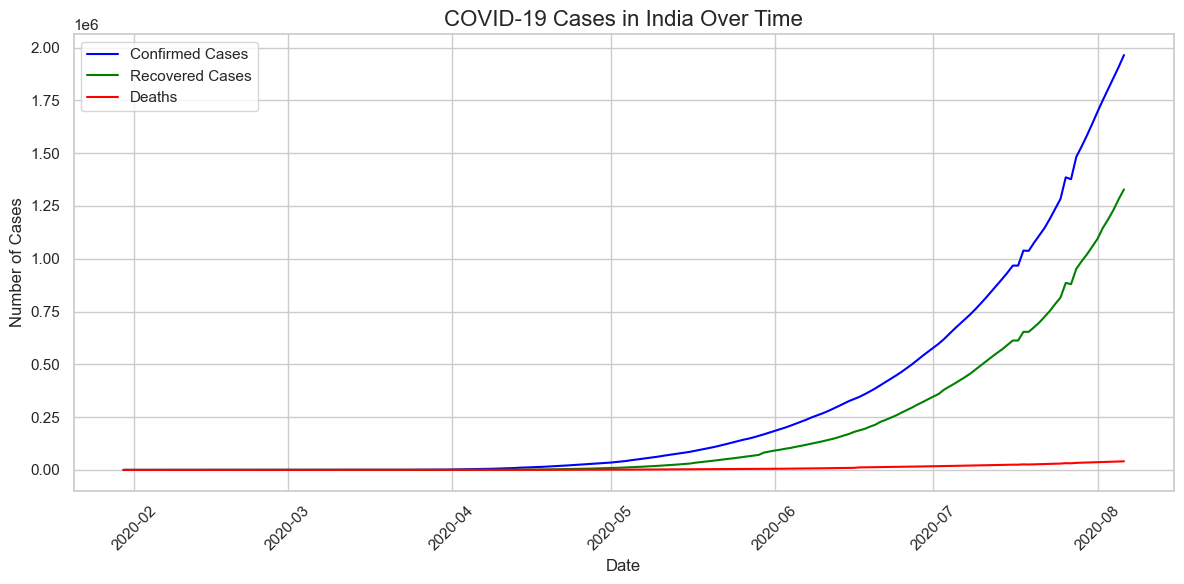

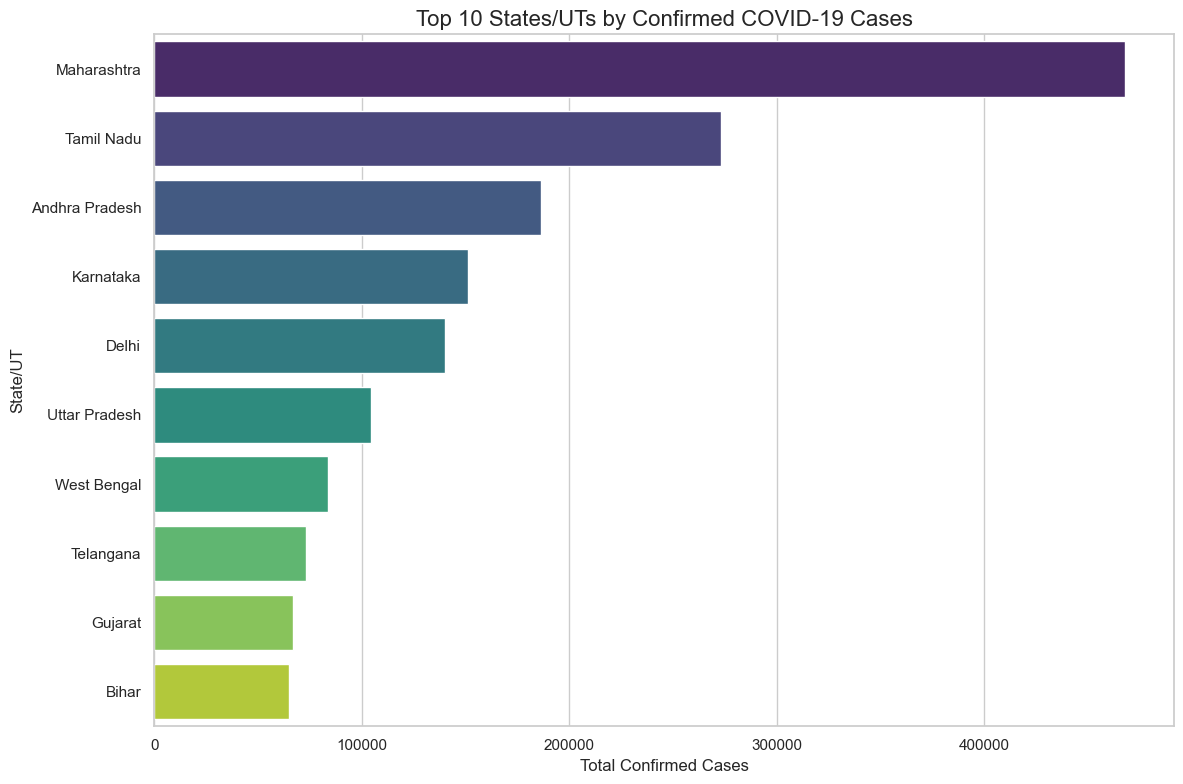

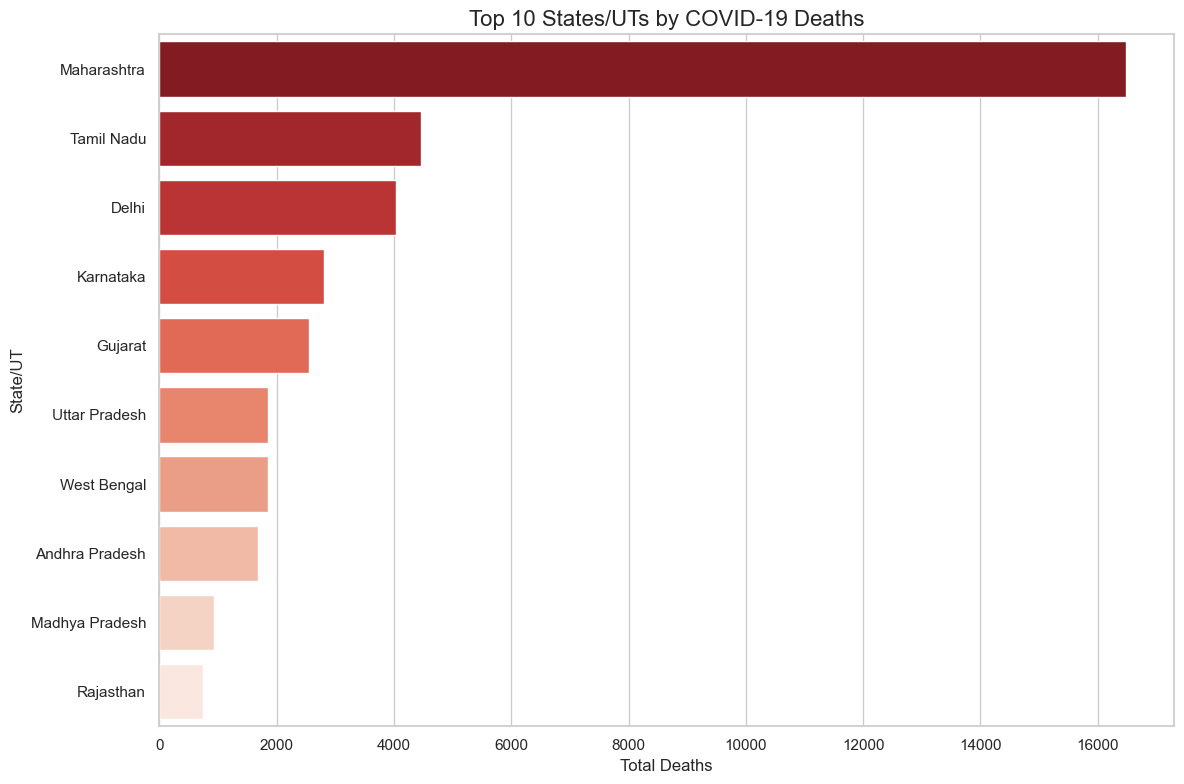

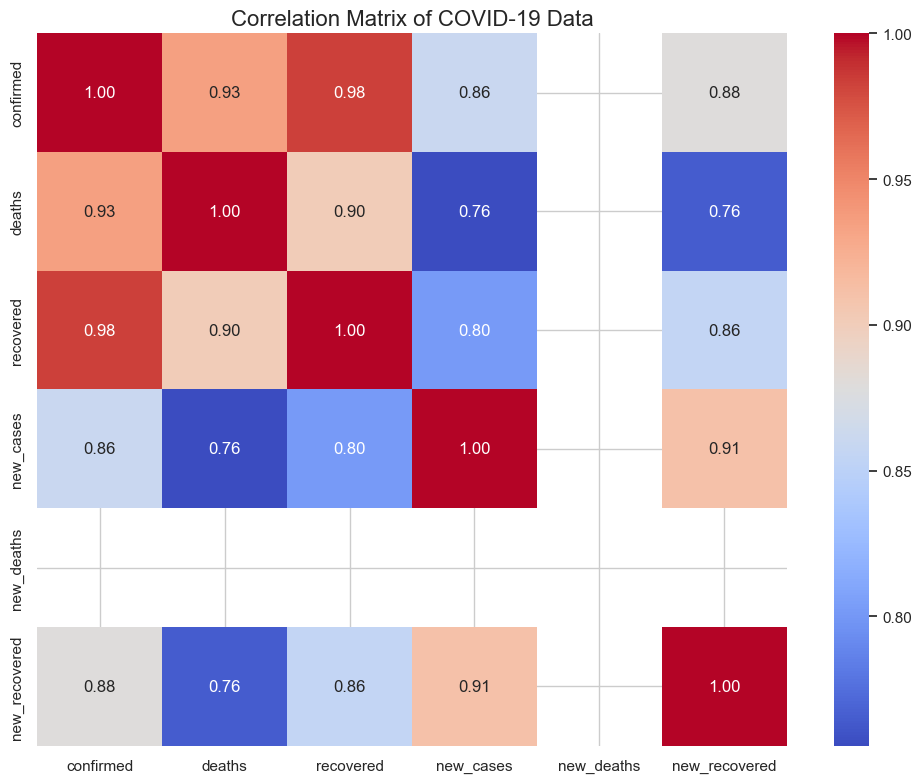

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('complete.csv')
except FileNotFoundError:
    print("The file 'complete.csv' was not found. Please make sure it is in the correct directory.")
    exit() # Exit the script if the file is not found

# 1. Data Summary and Cleaning 

print("## 1. Data Summary and Cleaning")

# Display the first few rows of the dataframe
print("\n### First 5 rows of the dataset:")
print(df.head())

# Display the shape of the dataframe
print("\n### Shape of the dataset (rows, columns):")
print(df.shape)

# Display column names
print("\n### Column names:")
print(df.columns)

# Check for missing values
print("\n### Missing values in each column:")
print(df.isnull().sum())

# Get a concise summary of the dataframe
print("\n### Dataframe Info:")
df.info()

# Rename columns for easier access
df.rename(columns={
    'Date': 'date',
    'Name of State / UT': 'state',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Total Confirmed cases': 'confirmed',
    'Death': 'deaths',
    'Cured/Discharged/Migrated': 'recovered',
    'New cases': 'new_cases',
    'New deaths': 'new_deaths',
    'New recovered': 'new_recovered'
}, inplace=True)

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# FIX: Convert 'deaths' column to numeric, coercing errors to NaN, then fill NaNs with 0
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce').fillna(0)

# Convert 'deaths' to integer type
df['deaths'] = df['deaths'].astype(int)

print("\n### Column names after renaming:")
print(df.columns)

print("\n### Dataframe Info after cleaning:")
df.info()

#2. Statistical Analysis

print("\n\n## 2. Statistical Analysis")

# Get the latest date in the dataset
latest_date = df['date'].max()
print(f"\n### Analysis based on latest data from: {latest_date.date()}")

# Get the data from the latest date and create a copy to avoid SettingWithCopyWarning
latest_df = df[df['date'] == latest_date].copy()

# Total cases, deaths, and recoveries for India on the latest date
total_confirmed = latest_df['confirmed'].sum()
total_deaths = latest_df['deaths'].sum()
total_recovered = latest_df['recovered'].sum()

print(f"\n- **Total Confirmed Cases in India:** {int(total_confirmed)}")
print(f"- **Total Deaths in India:** {int(total_deaths)}")
print(f"- **Total Recovered in India:** {int(total_recovered)}")

# Calculate active cases
latest_df['active'] = latest_df['confirmed'] - latest_df['deaths'] - latest_df['recovered']
total_active = latest_df['active'].sum()
print(f"- **Total Active Cases in India:** {int(total_active)}")


# Calculate recovery rate and death rate
recovery_rate = (total_recovered / total_confirmed) * 100
death_rate = (total_deaths / total_confirmed) * 100

print(f"- **Recovery Rate:** {recovery_rate:.2f}%")
print(f"- **Death Rate:** {death_rate:.2f}%")

# Top 10 states with the most confirmed cases
top_10_confirmed = latest_df.groupby('state')['confirmed'].sum().sort_values(ascending=False).head(10)
print("\n### Top 10 States/UTs by Confirmed Cases:")
print(top_10_confirmed)


# 3. Visualizations

print("\n\n## 3. Visualizations")
print("Generating plots...")

# Set plot style
sns.set(style="whitegrid")

#Time Series Plots

# Group data by date to get daily totals for India
daily_cases = df.groupby('date')[['confirmed', 'recovered', 'deaths']].sum()

# Plotting the trend of confirmed, recovered, and death cases in India
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases['confirmed'], label='Confirmed Cases', color='blue')
plt.plot(daily_cases.index, daily_cases['recovered'], label='Recovered Cases', color='green')
plt.plot(daily_cases.index, daily_cases['deaths'], label='Deaths', color='red')
plt.title('COVID-19 Cases in India Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('india_cases_over_time.png')
print("- Saved 'india_cases_over_time.png'")


#Bar Plots for State-wise Comparison

# Top 10 states by confirmed cases
top_10_states_confirmed = latest_df.sort_values(by='confirmed', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='confirmed', y='state', data=top_10_states_confirmed, palette='viridis')
plt.title('Top 10 States/UTs by Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Total Confirmed Cases', fontsize=12)
plt.ylabel('State/UT', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_states_confirmed.png')
print("- Saved 'top_10_states_confirmed.png'")


# Top 10 states by deaths
top_10_states_deaths = latest_df.sort_values(by='deaths', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='deaths', y='state', data=top_10_states_deaths, palette='Reds_r')
plt.title('Top 10 States/UTs by COVID-19 Deaths', fontsize=16)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('State/UT', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_states_deaths.png')
print("- Saved 'top_10_states_deaths.png'")


#Correlation Heatmap

# Calculate the correlation matrix
correlation_matrix = df[['confirmed', 'deaths', 'recovered', 'new_cases', 'new_deaths', 'new_recovered']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Data', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("- Saved 'correlation_heatmap.png'")

print("\nAnalysis and visualization complete!")

## Statistical Comparison (as of latest date)

| Metric                | Maharashtra | Delhi       |
|-----------------------|-------------|-------------|
| Total Confirmed Cases | 468265      | 140232      |
| Total Deaths          | 16476       | 4044        |
| Total Recovered       | 305521      | 126116      |

Generating comparison plots...
- Saved 'maharashtra_vs_delhi_confirmed.png'
- Saved 'maharashtra_vs_delhi_new_cases.png'

Comparison complete!


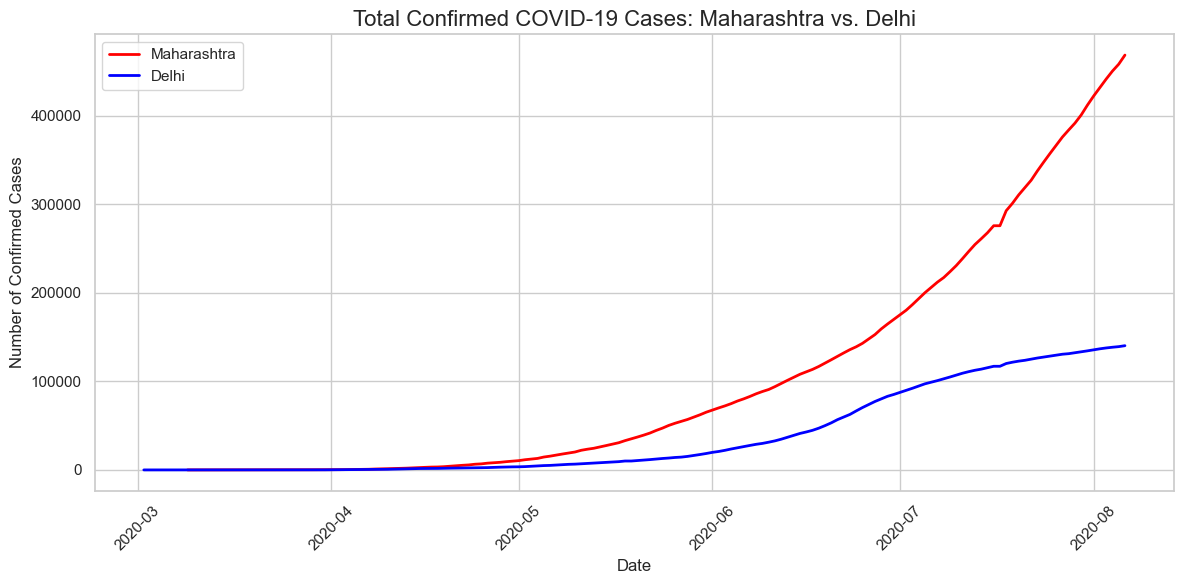

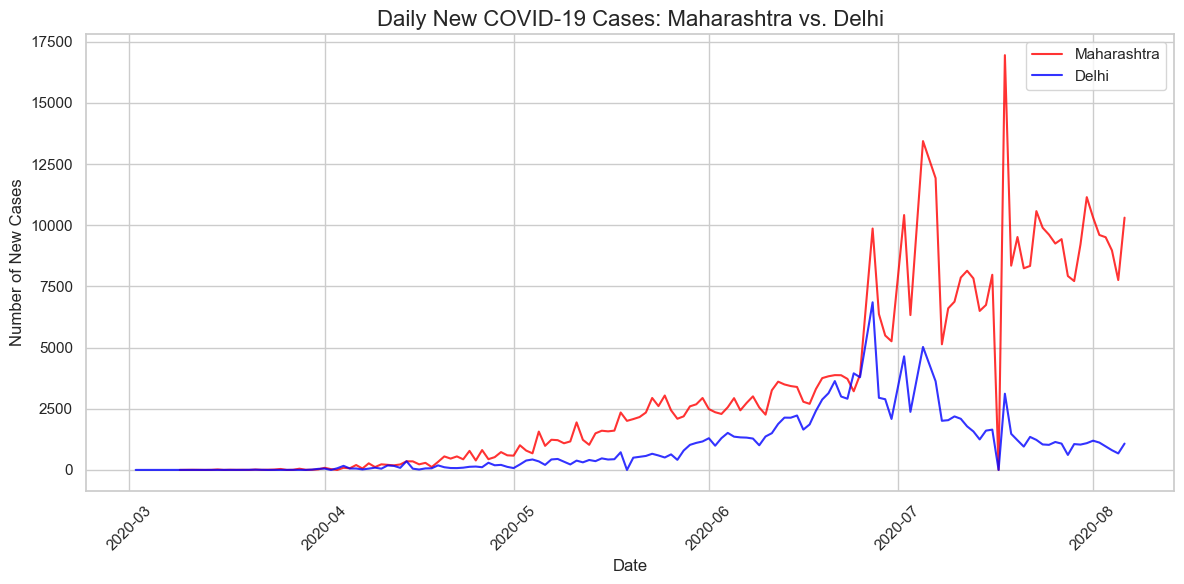

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('complete.csv')
except FileNotFoundError:
    print("The file 'complete.csv' was not found. Please make sure it is in the correct directory.")
    exit()

#1. Data Cleaning and Preparation

# Rename columns for easier access
df.rename(columns={
    'Date': 'date',
    'Name of State / UT': 'state',
    'Total Confirmed cases': 'confirmed',
    'Death': 'deaths',
    'Cured/Discharged/Migrated': 'recovered',
    'New cases': 'new_cases'
}, inplace=True)

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Clean the 'deaths' column by converting it to a numeric type
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce').fillna(0).astype(int)


#2. Filter Data for Maharashtra and Delhi

# Isolate the data for each state
maharashtra_df = df[df['state'] == 'Maharashtra'].copy()
delhi_df = df[df['state'] == 'Delhi'].copy()


#3. Statistical Comparison (Latest Data)

print("## Statistical Comparison (as of latest date)\n")

# Get the latest data for each state
latest_maharashtra = maharashtra_df.sort_values(by='date', ascending=False).iloc[0]
latest_delhi = delhi_df.sort_values(by='date', ascending=False).iloc[0]

print("| Metric                | Maharashtra | Delhi       |")
print("|-----------------------|-------------|-------------|")
print(f"| Total Confirmed Cases | {int(latest_maharashtra['confirmed']):<11} | {int(latest_delhi['confirmed']):<11} |")
print(f"| Total Deaths          | {int(latest_maharashtra['deaths']):<11} | {int(latest_delhi['deaths']):<11} |")
print(f"| Total Recovered       | {int(latest_maharashtra['recovered']):<11} | {int(latest_delhi['recovered']):<11} |")


#4. Comparative Visualizations

print("\nGenerating comparison plots...")

# Set plot style
sns.set(style="whitegrid")

# Plotting Total Confirmed Cases Over Time
plt.figure(figsize=(12, 6))
plt.plot(maharashtra_df['date'], maharashtra_df['confirmed'], label='Maharashtra', color='red', linewidth=2)
plt.plot(delhi_df['date'], delhi_df['confirmed'], label='Delhi', color='blue', linewidth=2)
plt.title('Total Confirmed COVID-19 Cases: Maharashtra vs. Delhi', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Confirmed Cases', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('maharashtra_vs_delhi_confirmed.png')
print("- Saved 'maharashtra_vs_delhi_confirmed.png'")

# Plotting Daily New Cases Over Time
plt.figure(figsize=(12, 6))
plt.plot(maharashtra_df['date'], maharashtra_df['new_cases'], label='Maharashtra', color='red', alpha=0.8)
plt.plot(delhi_df['date'], delhi_df['new_cases'], label='Delhi', color='blue', alpha=0.8)
plt.title('Daily New COVID-19 Cases: Maharashtra vs. Delhi', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of New Cases', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('maharashtra_vs_delhi_new_cases.png')
print("- Saved 'maharashtra_vs_delhi_new_cases.png'")

print("\nComparison complete!")

## Statistical Comparison (as of latest date)

| State       |   Confirmed Cases |   Deaths |   Recovered |
|:------------|------------------:|---------:|------------:|
| Maharashtra |            468265 |    16476 |      305521 |
| Delhi       |            140232 |     4044 |      126116 |
| Karnataka   |            151449 |     2804 |       74679 |
| Tamil Nadu  |            273460 |     4461 |      214815 |
| West Bengal |             83800 |     1846 |       58962 |

Generating comparison plots...
- Saved 'five_state_comparison_confirmed.png'


/var/folders/vv/hlt_g58j05x46tknj2fh18_r0000gn/T/ipykernel_23552/3240306838.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_df_sorted['Confirmed Cases'], y=latest_df_sorted.index, palette='viridis')


- Saved 'five_state_barchart_latest.png'

Analysis complete!


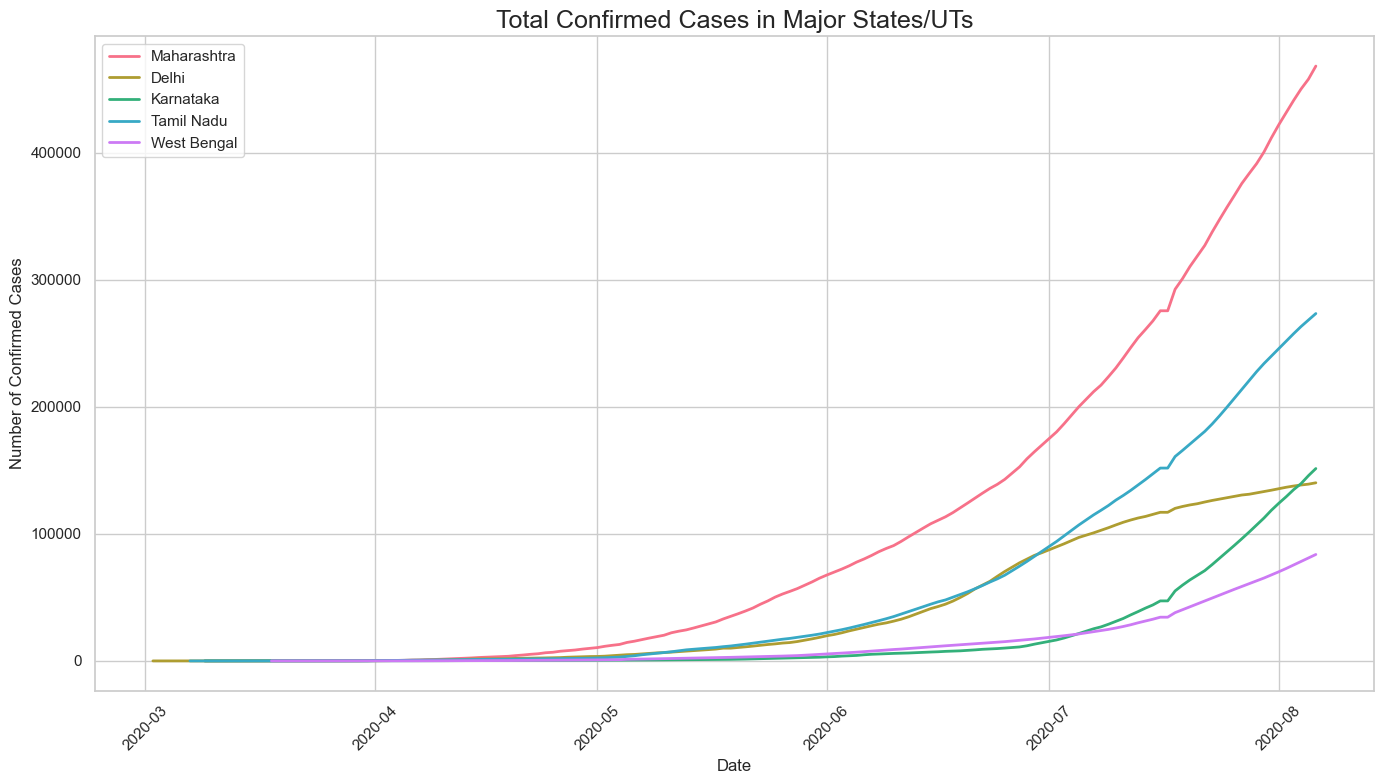

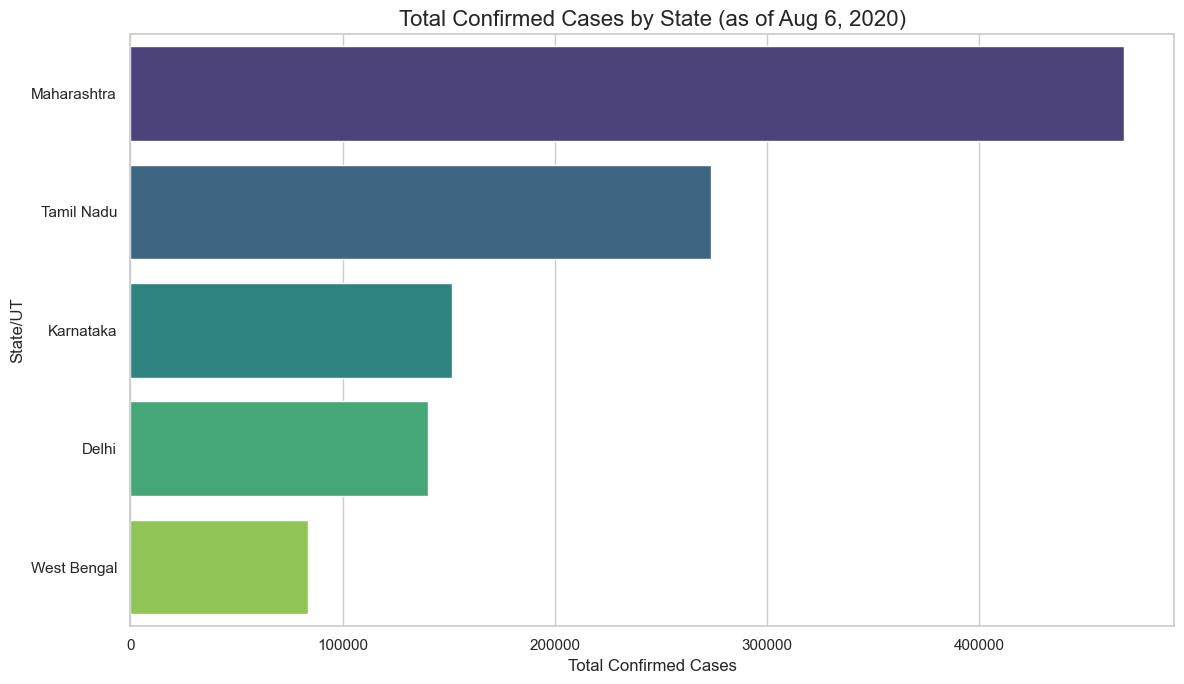

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('complete.csv')
except FileNotFoundError:
    print("The file 'complete.csv' was not found. Please make sure it is in the correct directory.")
    exit()

#1. Data Cleaning and Preparation

# Rename columns
df.rename(columns={
    'Date': 'date',
    'Name of State / UT': 'state',
    'Total Confirmed cases': 'confirmed',
    'Death': 'deaths',
    'Cured/Discharged/Migrated': 'recovered'
}, inplace=True)

# Convert data types
df['date'] = pd.to_datetime(df['date'])
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce').fillna(0).astype(int)


# 2. Filter for the Five Major States/UTs

states_to_compare = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'West Bengal']
comparison_df = df[df['state'].isin(states_to_compare)].copy()


#3. Statistical Comparison Table

print("## Statistical Comparison (as of latest date)\n")
latest_stats = []
for state in states_to_compare:
    latest_data = comparison_df[comparison_df['state'] == state].sort_values(by='date', ascending=False).iloc[0]
    latest_stats.append({
        'State': state,
        'Confirmed Cases': int(latest_data['confirmed']),
        'Deaths': int(latest_data['deaths']),
        'Recovered': int(latest_data['recovered'])
    })

# Create a DataFrame for the table
stats_df = pd.DataFrame(latest_stats).set_index('State')
print(stats_df.to_markdown())


# 4. Comparative Visualizations 

print("\nGenerating comparison plots...")
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for visual distinction
palette = sns.color_palette("husl", len(states_to_compare))

# Plotting Total Confirmed Cases Over Time for all 5 states
for i, state in enumerate(states_to_compare):
    state_df = comparison_df[comparison_df['state'] == state]
    plt.plot(state_df['date'], state_df['confirmed'], label=state, color=palette[i], linewidth=2)

plt.title('Total Confirmed Cases in Major States/UTs', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Confirmed Cases', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('five_state_comparison_confirmed.png')
print("- Saved 'five_state_comparison_confirmed.png'")


# Bar chart for the latest total confirmed cases
latest_df_sorted = stats_df.sort_values(by='Confirmed Cases', ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=latest_df_sorted['Confirmed Cases'], y=latest_df_sorted.index, palette='viridis')
plt.title('Total Confirmed Cases by State (as of Aug 6, 2020)', fontsize=16)
plt.xlabel('Total Confirmed Cases', fontsize=12)
plt.ylabel('State/UT', fontsize=12)
plt.tight_layout()
plt.savefig('five_state_barchart_latest.png')
print("- Saved 'five_state_barchart_latest.png'")


print("\nAnalysis complete!")